# Data Cleaning (Abby)

- X Dropping missing vals 
- X Converting fire/no fire to 0 and 1 
- X Converting columns to appropriate data types 
- X Converting region to 1 or 2? 
- XCreating test and training data sets

In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
import warnings
import itertools
import time
warnings.filterwarnings('ignore')

data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

df = data.copy()
#dropping missing vals
df.dropna(inplace=True)

# dropping a row that was just for labelling
df = df.drop(index=123,axis=0)

# fixing index 
df.reset_index(inplace=True)

In [14]:
# Region 1 and 2
# Region 1 is Bejaia and Region 2 is Sidi Bel-Abbes 
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
# getting rid of column names weird spacing
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
#Converting Not fire/Fire (with unnecessary spacing) to 0 and 1
print(df['Classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [17]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [18]:
df['Classes'] = df['Classes'].replace('not fire', 0)
df['Classes'] = df['Classes'].replace('fire', 1)
df.Classes.unique()

array([0, 1])

In [19]:
# converting column data types
df['DC']=df['DC'].astype('float')
df['ISI']=df['ISI'].astype('float')
df['BUI']=df['BUI'].astype('float')
df['FWI']=df['FWI'].astype('float')
df['day']=df['day'].astype('int')
df['month']=df['month'].astype('int')
df['year']=df['year'].astype('int')
df['Temperature']=df['Temperature'].astype('int')
df['RH']=df['RH'].astype('int')
df['Ws']=df['Ws'].astype('int')
df['Rain']=df['Rain'].astype('float')
df['FFMC']=df['FFMC'].astype('float')
df['DMC']=df['DMC'].astype('float')
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [20]:
df.dtypes

index            int64
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [21]:
# No null values :)
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [22]:
# No duplicates :)
df.duplicated().sum()

0

In [23]:
from sklearn.model_selection import train_test_split

#Creating training and test datasets
np.random.seed(2)
train = df.sample(round(df.shape[0]*0.7))
test = df.drop(train.index)

# Exploratory Data Analysis (Mel, Abby)

- heatmaps
- pairplots
- pie chart/barplot of fire vs no fire breakdown
- density plots of different vars
- (other stuff)

In [24]:
##Currently doing EDA solely on the entire data-- but I can separate into test/train if needed.
##the current test/train dataframes have many more columns

In [25]:
df.shape

(243, 16)

In [26]:
train.shape

(170, 16)

In [27]:
test.shape

(73, 16)

In [28]:
# Classes is the variable we're looking for. 0 - no fire // 1 - fire
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

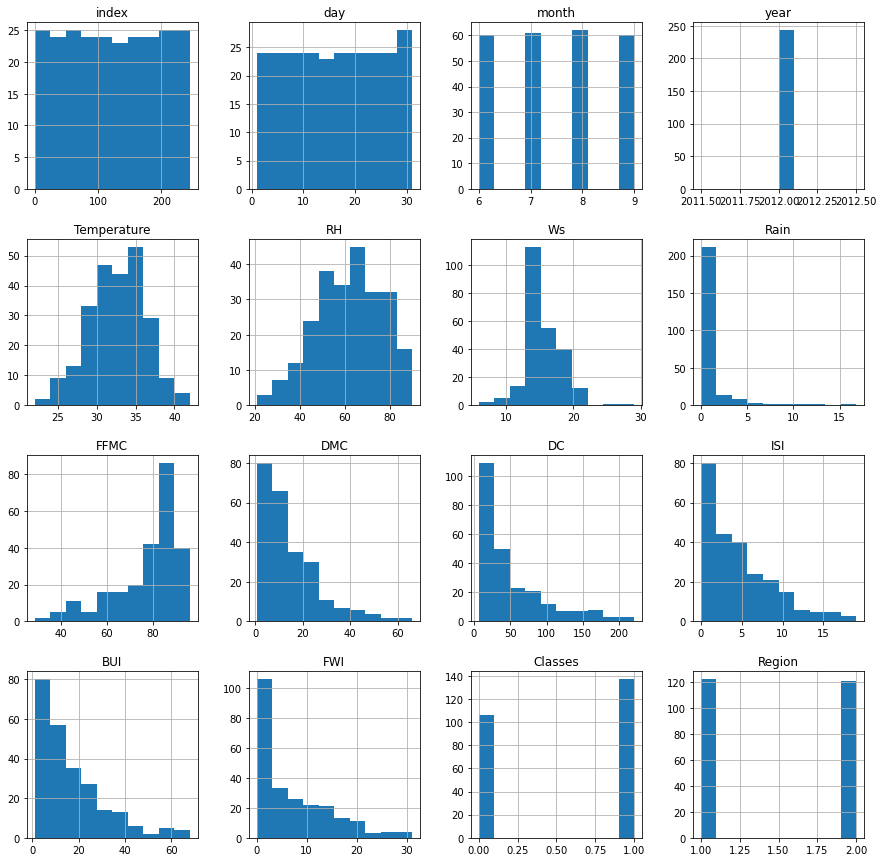

In [29]:
df.hist(figsize = (15,15))
plt.show()

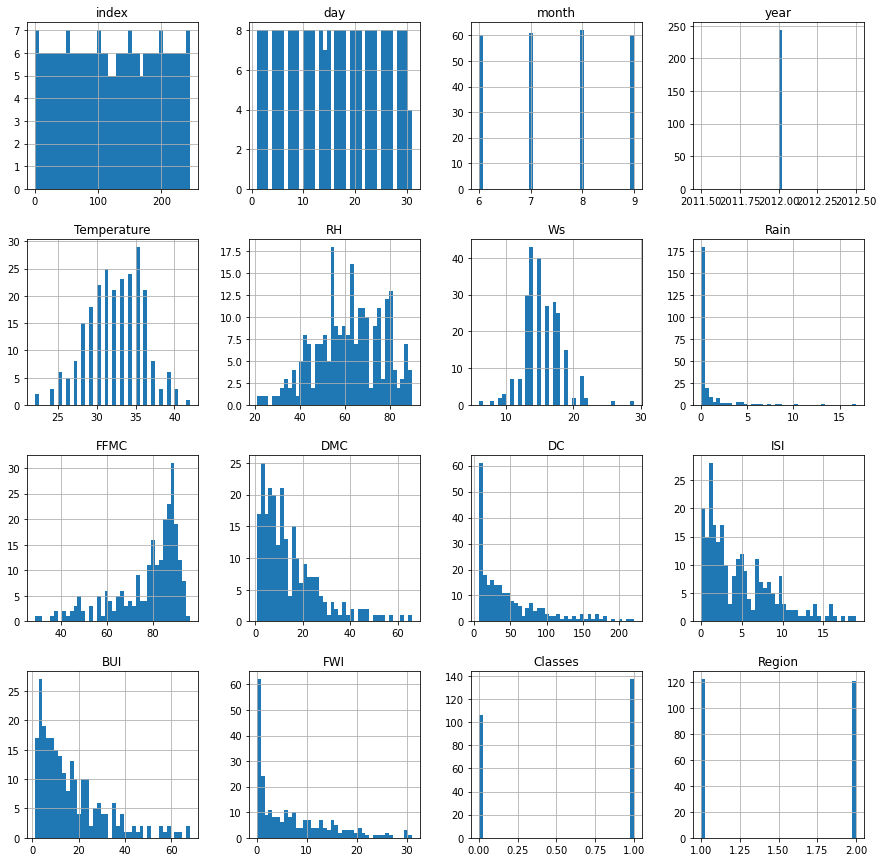

In [30]:
#same as above but with better binning

df.hist(figsize = (15,15), bins= 40)
plt.show()

In [31]:
df.describe()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,122.316872,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,1.497942
std,71.540562,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,1.000000
75%,184.500000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,2.000000
max,245.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [32]:
# for col in data.select_dtypes(include = float64):
#     if data[col].nunique() 

<AxesSubplot:>

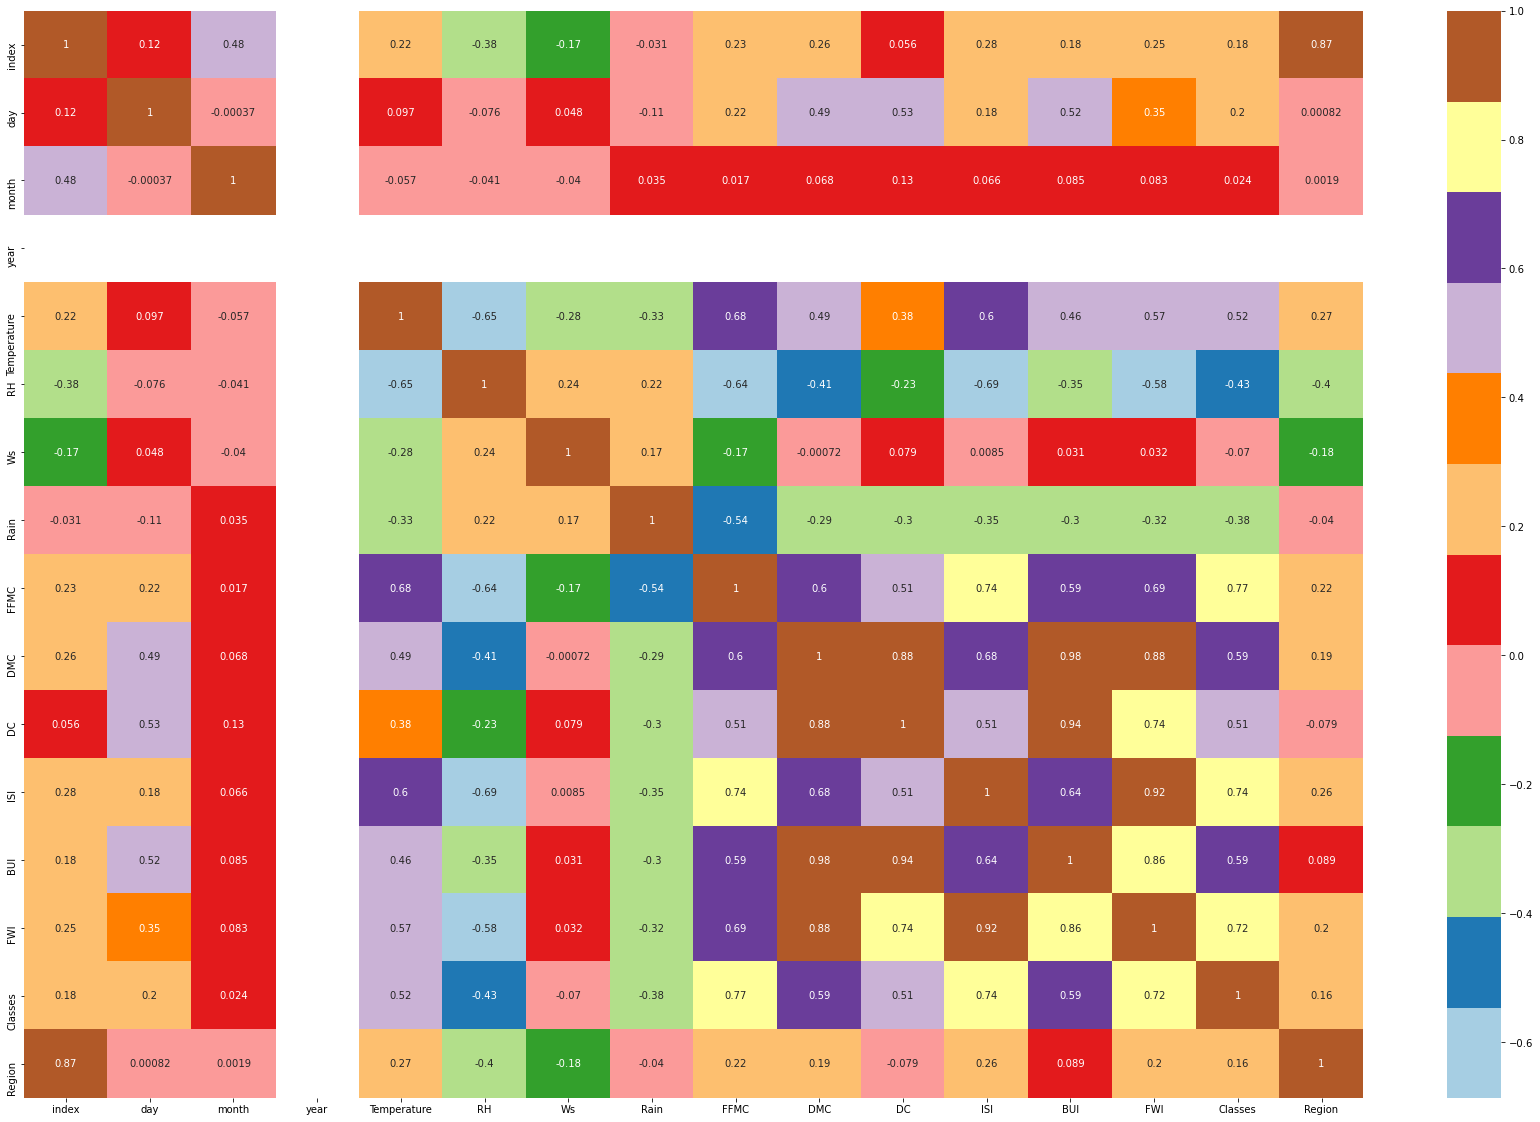

In [33]:
plt.figure(figsize = (30,20))
sns.heatmap(data = df.corr(), cmap = "Paired", cbar = True, annot = True)

In [34]:
fire_counts_df = df.Classes.value_counts()

In [35]:
fire_counts_test = test.Classes.value_counts()

In [36]:
fire_counts_train = train.Classes.value_counts()

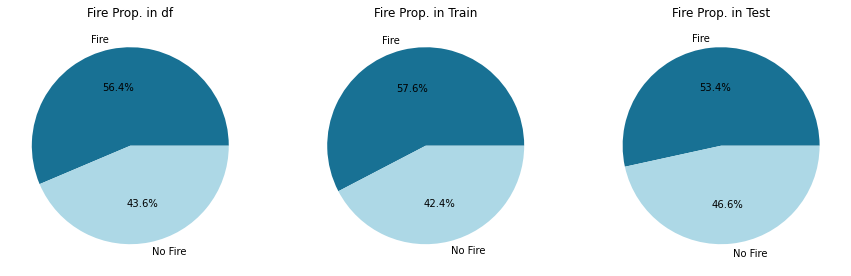

In [37]:
labels = ["Fire", "No Fire"]
fig = plt.figure(figsize = (15,15))
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(fire_counts_df, labels = labels, autopct= '%.1f%%', colors = ("#187194", "lightblue"))
plt.title("Fire Prop. in df")
ax2 = plt.subplot2grid((1,3),(0,1))
plt.pie(fire_counts_train, labels = labels, autopct= '%.1f%%', colors = ("#187194", "lightblue"))
plt.title("Fire Prop. in Train")
ax3 = plt.subplot2grid((1,3),(0,2))
plt.pie(fire_counts_test, labels = labels, autopct= '%.1f%%', colors = ("#187194", "lightblue"))
plt.title("Fire Prop. in Test")
plt.show()

# Logistic Regression Model Building (Arush, Mel)

- VIF for collinearity
- Use heatmaps/pairplots in EDA section
- Variable Selection Algorithms
- See if we need transformations by visualizing lineplots of response vs diff vairables
- building/printing model summary

In [38]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
     
    # predict the values
    pred_values = model.predict(data) # these will be probabilities
    
    pred_values = np.abs(pred_values)
    pred_values = pred_values.apply(lambda x: 1 if x > 1 else x)
    
    # Specify bins to do the cutoff thing
    bins = np.array([0, cutoff, 1])
    
    # Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    
    precision = (cm[1,1])/(cm[1,1]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1]) # Recall
    
    # fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    # auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    # print("ROC-AUC = {:.1%}".format(auc_value))

In [39]:
# VIF test
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

        feature         VIF
0           day    1.548816
1         month    1.120089
2          year  482.030547
3   Temperature    2.347870
4            RH    2.785183
5            Ws    1.301353
6          Rain    1.565911
7          FFMC    4.986148
8           DMC   66.721558
9            DC   21.300967
10          ISI   53.888193
11          BUI  155.066601
12          FWI   93.763546


## Variable Selection

### Normal Forward Stepwise Selection

In [40]:
# Forward Stepwise Selection 

# Defining helpers

X = train[['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']]

def processSubset(predictor_subset):
    model = smf.ols('Classes~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model


def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best


def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2, 2, 1)

    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')


    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [41]:
models_best = forward_selection()

Processed  10 models on 1 predictors in 0.04326200485229492 seconds.
Processed  9 models on 2 predictors in 0.04274702072143555 seconds.
Processed  8 models on 3 predictors in 0.04635882377624512 seconds.
Processed  7 models on 4 predictors in 0.04434490203857422 seconds.
Processed  6 models on 5 predictors in 0.046198129653930664 seconds.
Processed  5 models on 6 predictors in 0.04361104965209961 seconds.
Processed  4 models on 7 predictors in 0.03994584083557129 seconds.
Processed  3 models on 8 predictors in 0.03184700012207031 seconds.
Processed  2 models on 9 predictors in 0.023681640625 seconds.
Processed  1 models on 10 predictors in 0.013283014297485352 seconds.
Total elapsed time: 0.4023561477661133 seconds.


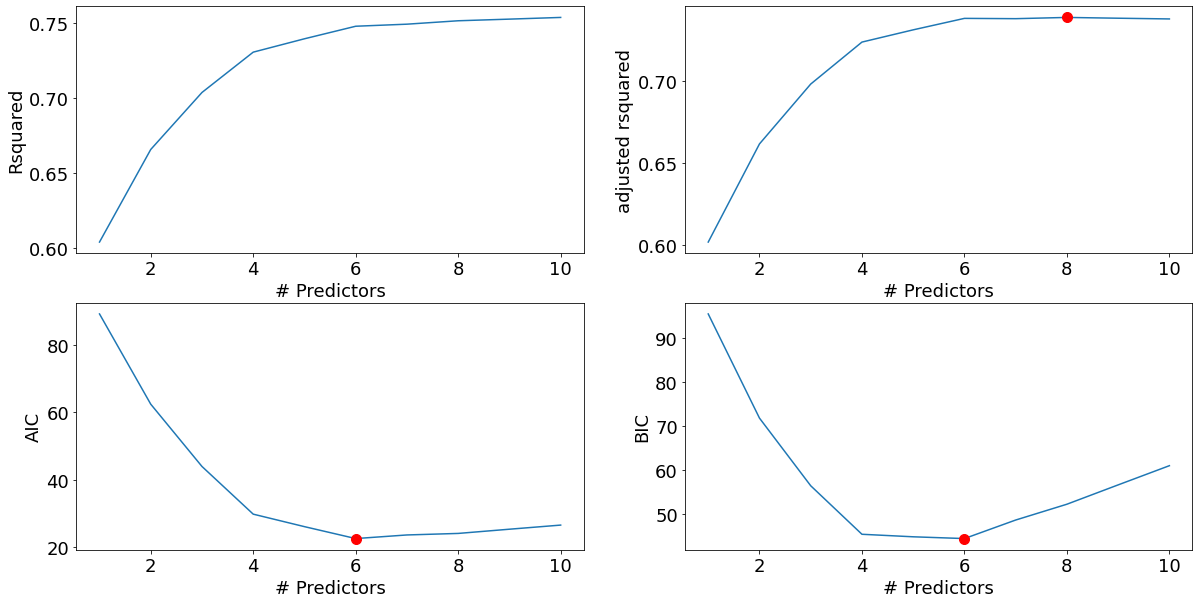

In [42]:
best_sub_plots()

In [43]:
# Finding the best model

best_subset_model_no_interaction = models_best.loc[6,'model']
models_best.loc[6,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     80.56
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           3.37e-46
Time:                        09:34:13   Log-Likelihood:                -4.2746
No. Observations:                 170   AIC:                             22.55
Df Residuals:                     163   BIC:                             44.50
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2658      0.274     -8.267      0.000      -2.807      -1.725
FFMC           0.0271      0.002     11.131      0.000       0.022       0.032
FWI            0.0499      0.006      7.952      0.000       0.038       0.062
RH             0.0144      0.002      7.009      0.000       0.010       0.018
BUI           -0.0125      0.003     -4.489      0.000      -0.018      -0.007
Ws            -0.0220      0.008     -2.705      0.008      -0.038      -0.006
Rain           0.0258      0.011      2.323      0.021       0.004       0.048
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.243
Skew:                           0.025   Prob(JB):                        0.537
Kurtosis:                       3.416   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 88.2%
Precision = 83.1%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 27.8%


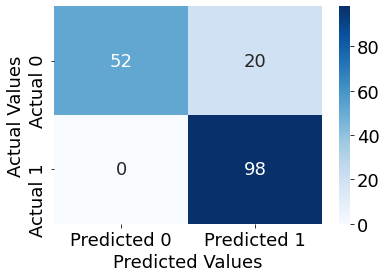

In [44]:
confusion_matrix_data(train, train.Classes, best_subset_model_no_interaction, 0.3)

Classification accuracy = 78.1%
Precision = 71.7%
TPR or Recall = 97.4%
FNR = 2.6%
FPR = 44.1%


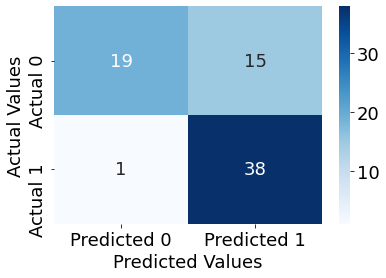

In [45]:
confusion_matrix_data(test, test.Classes, best_subset_model_no_interaction, 0.3)

### Forward stepwise with all interaction terms

In [46]:
X = train[['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']]

X_backup = train[['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']]

In [47]:
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating int. terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # creating int, terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # creating the same x

In [48]:
models_best = forward_selection()

Processed  55 models on 1 predictors in 0.18903517723083496 seconds.
Processed  54 models on 2 predictors in 0.22898006439208984 seconds.
Processed  53 models on 3 predictors in 0.4194319248199463 seconds.
Processed  52 models on 4 predictors in 0.4608299732208252 seconds.
Processed  51 models on 5 predictors in 0.5180537700653076 seconds.
Processed  50 models on 6 predictors in 0.5694577693939209 seconds.
Processed  49 models on 7 predictors in 0.6135871410369873 seconds.
Processed  48 models on 8 predictors in 0.4835658073425293 seconds.
Processed  47 models on 9 predictors in 0.5843789577484131 seconds.
Processed  46 models on 10 predictors in 0.8242301940917969 seconds.
Processed  45 models on 11 predictors in 0.8713710308074951 seconds.
Processed  44 models on 12 predictors in 0.8204138278961182 seconds.
Processed  43 models on 13 predictors in 0.7980570793151855 seconds.
Processed  42 models on 14 predictors in 0.6430730819702148 seconds.
Processed  41 models on 15 predictors in 

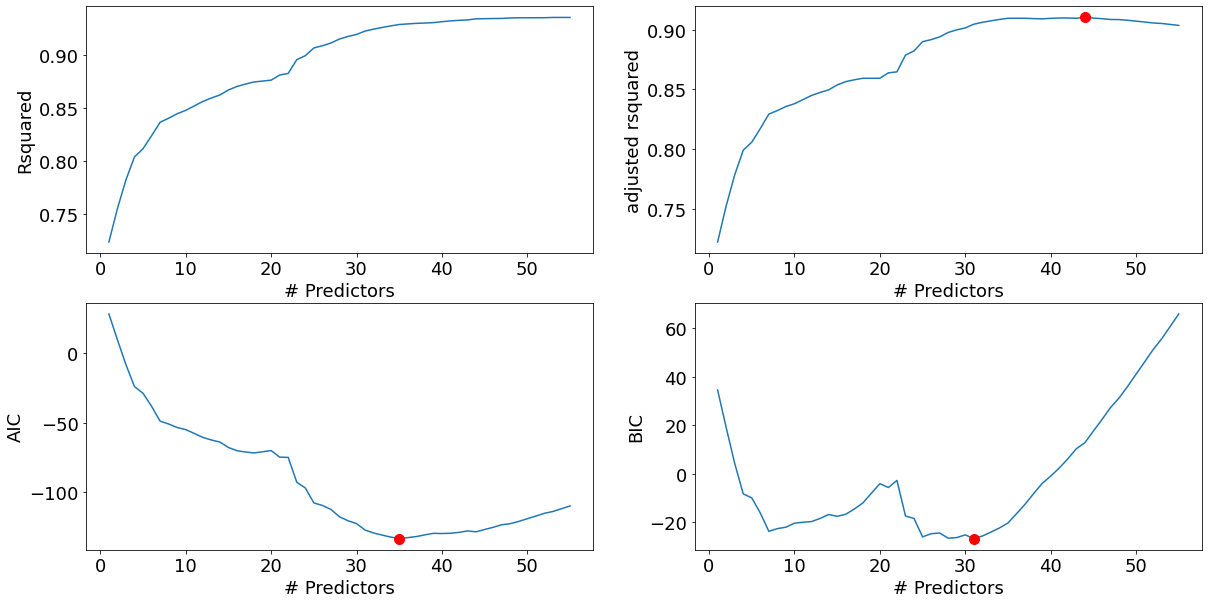

In [49]:
best_sub_plots()

In [50]:
# Optimizing for AIC because we want a more aggressive model

best_fwd_reg_model_AIC = models_best['model'][35]
best_fwd_reg_model_AIC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     49.56
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           7.26e-61
Time:                        09:34:47   Log-Likelihood:                 102.62
No. Observations:                 170   AIC:                            -133.2
Df Residuals:                     134   BIC:                            -20.34
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4329      0.970     -0.446      0.656      -2.351       1.485
RH_ISI               0.0100      0.002      4.709      0.000       0.006       0.014
ISI_FWI              0.0031      0.004      0.850      0.397      -0.004       0.010
ISI                 -2.4598      0.562     -4.380      0.000      -3.571      -1.349
DMC_ISI              0.0038      0.005      0.706      0.481      -0.007       0.014
Temperature_Ws       0.0021      0.002      1.214      0.227      -0.001       0.005
Rain_FWI            -0.0238      0.064     -0.372      0.710      -0.151       0.103
RH                  -0.0004      0.016     -0.026      0.979      -0.031       0.030
Rain_DC              0.0006      0.003      0.230      0.818      -0.005       0.006
Ws_FWI               0.0020      0.002      0.953      0.342      -0.002       0.006
Rain_Ws          -9.792e-05      0.002     -0.058      0.954      -0.003       0.003
Rain_ISI             0.1046      0.083      1.262      0.209      -0.059       0.268
FFMC                 0.0447      0.012      3.812      0.000       0.021       0.068
RH_DMC               0.0003      0.000      0.930      0.354      -0.000       0.001
Ws_FFMC             -0.0023      0.001     -3.767      0.000      -0.004      -0.001
Temperature         -0.0015      0.033     -0.044      0.965      -0.067       0.064
Temperature_Rain     0.0048      0.004      1.230      0.221      -0.003       0.013
Temperature_DC      -0.0028      0.001     -3.464      0.001      -0.004      -0.001
Ws_RH                0.0011      0.000      2.801      0.006       0.000       0.002
Temperature_BUI      0.0242      0.008      3.024      0.003       0.008       0.040
DMC_BUI              0.0019      0.000      4.014      0.000       0.001       0.003
DMC_FWI             -0.0032      0.003     -1.100      0.273      -0.009       0.003
FWI                  3.4068      0.410      8.304      0.000       2.595       4.218
FFMC_FWI            -0.0308      0.004     -7.891      0.000      -0.038      -0.023
FFMC_BUI            -0.0109      0.004     -3.073      0.003      -0.018      -0.004
FFMC_DC              0.0016      0.000      4.487      0.000       0.001       0.002
FFMC_ISI             0.0198      0.005      3.758      0.000       0.009       0.030
Temperature_DMC     -0.0180      0.007     -2.710      0.008      -0.031      -0.005
RH_FWI              -0.0075      0.002     -4.831      0.000      -0.011      -0.004
BUI_FWI             -0.0015      0.001     -1.182      0.239      -0.004       0.001
DC                  -0.0533      0.016     -3.317      0.001      -0.085      -0.022
RH_DC                0.0003   9.21e-05      3.507      0.001       0.000       0.001
Temperature_RH      -0.0008      0.000     -2.049      0.042      -0.002   -2.88e-05
FFMC_DMC             0.

Classification accuracy = 97.1%
Precision = 95.1%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 6.9%


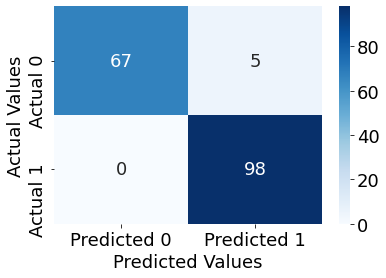

In [51]:
confusion_matrix_data(train, train.Classes, best_fwd_reg_model_AIC, 0.3)

Classification accuracy = 84.9%
Precision = 80.4%
TPR or Recall = 94.9%
FNR = 5.1%
FPR = 26.5%


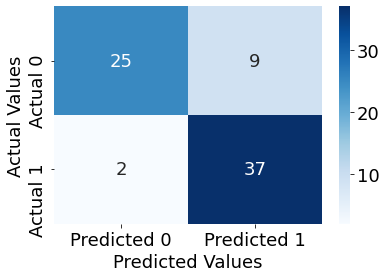

In [52]:
confusion_matrix_data(test, test.Classes, best_fwd_reg_model_AIC, 0.3)

## Forward Stepwise with just some of the variables as interaction terms

In [53]:
X = train[['FFMC', 'FWI', 'RH', 'BUI', 'Ws', 'Rain']]

X_backup = train[['FFMC', 'FWI', 'RH', 'BUI', 'Ws', 'Rain']]

for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating int. terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # creating int, terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # creating the same x

In [54]:
models_best = forward_selection()

Processed  21 models on 1 predictors in 0.14211821556091309 seconds.
Processed  20 models on 2 predictors in 0.08670806884765625 seconds.
Processed  19 models on 3 predictors in 0.0998830795288086 seconds.
Processed  18 models on 4 predictors in 0.11410093307495117 seconds.
Processed  17 models on 5 predictors in 0.12129998207092285 seconds.
Processed  16 models on 6 predictors in 0.12950801849365234 seconds.
Processed  15 models on 7 predictors in 0.13457775115966797 seconds.
Processed  14 models on 8 predictors in 0.14148402214050293 seconds.
Processed  13 models on 9 predictors in 0.13875293731689453 seconds.
Processed  12 models on 10 predictors in 0.14294195175170898 seconds.
Processed  11 models on 11 predictors in 0.14212584495544434 seconds.
Processed  10 models on 12 predictors in 0.1386122703552246 seconds.
Processed  9 models on 13 predictors in 0.13203907012939453 seconds.
Processed  8 models on 14 predictors in 0.1266930103302002 seconds.
Processed  7 models on 15 predicto

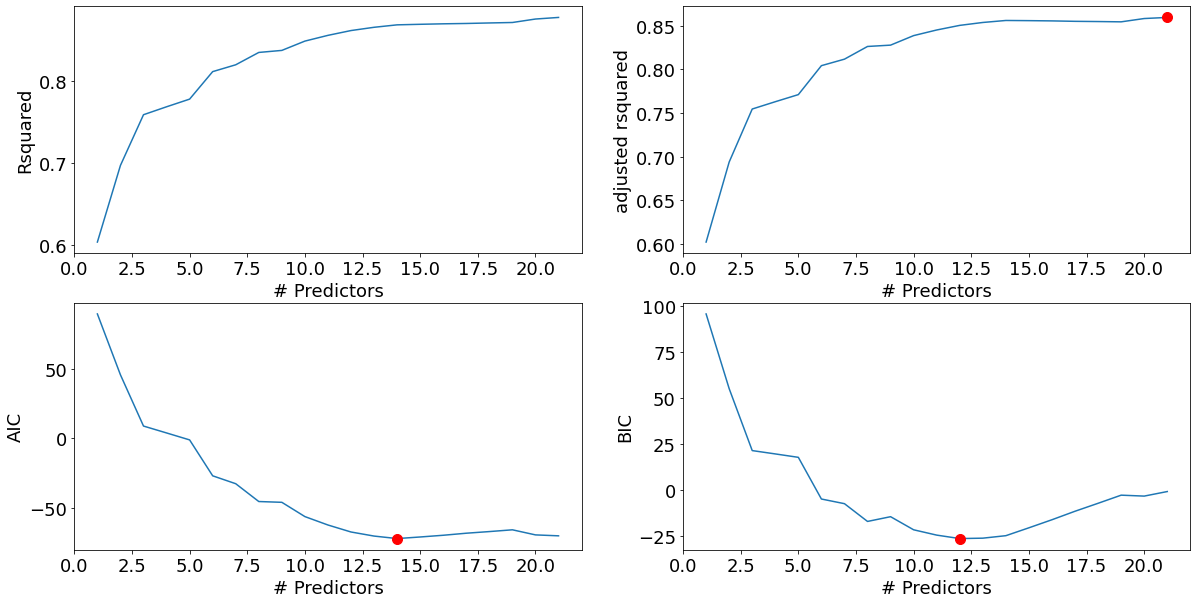

In [55]:
best_sub_plots()

In [56]:
best_fwd_reg_model_AIC_some = models_best['model'][13]
best_fwd_reg_model_AIC_some.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     77.01
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           6.68e-61
Time:                        09:34:50   Log-Likelihood:                 48.950
No. Observations:                 170   AIC:                            -69.90
Df Residuals:                     156   BIC:                            -26.00
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6334      0.982     -3.701      0.000      -5.573      -1.694
FFMC           0.0610      0.012      4.975      0.000       0.037       0.085
FWI_RH        -0.0009      0.000     -1.782      0.077      -0.002    9.35e-05
BUI_Ws         0.0004      0.001      0.761      0.448      -0.001       0.001
FWI_Rain       0.0365      0.010      3.770      0.000       0.017       0.056
RH             0.0277      0.013      2.077      0.039       0.001       0.054
FFMC_RH       -0.0004      0.000     -2.619      0.010      -0.001   -9.62e-05
FFMC_FWI      -0.0132      0.002     -6.526      0.000      -0.017      -0.009
FWI            1.3313      0.211      6.313      0.000       0.915       1.748
FFMC_Ws       -0.0013      0.000     -4.341      0.000      -0.002      -0.001
BUI           -0.1546      0.035     -4.409      0.000      -0.224      -0.085
RH_Ws          0.0009      0.000      2.995      0.003       0.000       0.001
FFMC_BUI       0.0012      0.000      3.343      0.001       0.000       0.002
RH_BUI         0.0003      0.000      2.140      0.034    2.53e-05       0.001
==============================================================================
Omnibus:                        7.989   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               13.875
Skew:                          -0.144   Prob(JB):                     0.000971
Kurtosis:                       4.370   Cond. No.                     3.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 95.9%
Precision = 93.3%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 9.7%


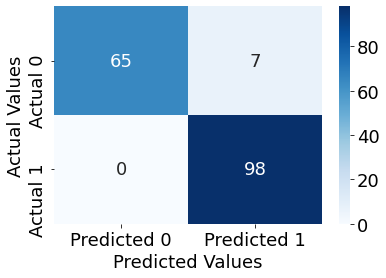

In [57]:
confusion_matrix_data(train, train.Classes, best_fwd_reg_model_AIC_some, 0.3)

Classification accuracy = 86.3%
Precision = 79.6%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 29.4%


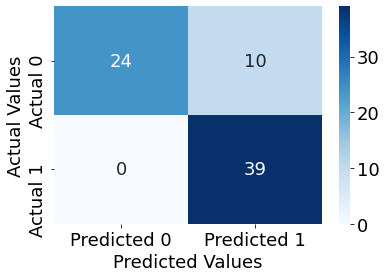

In [58]:
confusion_matrix_data(test, test.Classes, best_fwd_reg_model_AIC_some, 0.3)

### Trying all of the variables

In [59]:
logit_model = smf.logit(formula = 'Classes~Temperature+Rain+Ws+RH+FFMC+DMC+DC+ISI+BUI+FWI', data = train).fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35


In [60]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  170
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                           10
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        09:34:51   Log-Likelihood:            -4.1286e-05
converged:                       True   LL-Null:                       -115.84
Covariance Type:            nonrobust   LLR p-value:                 3.821e-44
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.5916    1.9e+05  -2.42e-05      1.000   -3.73e+05    3.73e+05
Temperature   -13.6444   1.44e+04     -0.001      0.999   -2.83e+04    2.83e+04
Rain           12.4549   1.08e+04      0.001    

Classification accuracy = 100.0%
Precision = 100.0%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 0.0%


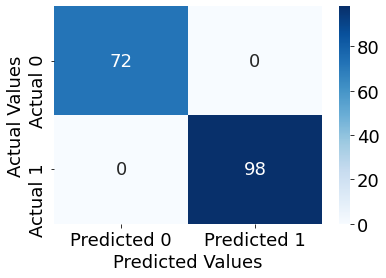

In [61]:
confusion_matrix_data(train, train.Classes, logit_model, 0.3)

Classification accuracy = 90.4%
Precision = 94.4%
TPR or Recall = 87.2%
FNR = 12.8%
FPR = 5.9%


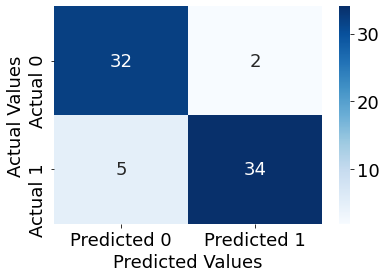

In [62]:
confusion_matrix_data(test, test.Classes, logit_model, 0.3)

### No Multi-collinearity model (jk lol)

In [63]:
logit_model = smf.logit(formula = 'Classes~Temperature+RH+Ws+Rain+FFMC', data = train).fit()

         Current function value: 0.000021
         Iterations: 35


In [64]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        09:34:51   Log-Likelihood:             -0.0035943
converged:                      False   LL-Null:                       -115.84
Covariance Type:            nonrobust   LLR p-value:                 4.689e-48
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1040.4847   2708.190     -0.384      0.701   -6348.440    4267.470
Temperature    -6.5868     25.026     -0.263      0.792     -55.638      42.464
RH             -0.3247      2.129     -0.153    

Classification accuracy = 100.0%
Precision = 100.0%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 0.0%


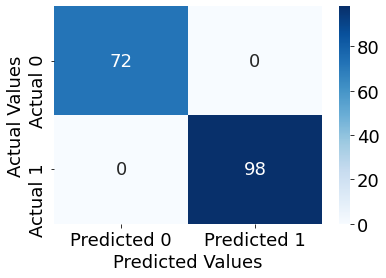

In [65]:
confusion_matrix_data(train, train.Classes, logit_model, 0.3)

Classification accuracy = 93.2%
Precision = 92.5%
TPR or Recall = 94.9%
FNR = 5.1%
FPR = 8.8%


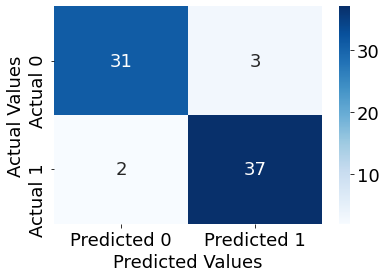

In [66]:
confusion_matrix_data(test, test.Classes, logit_model, 0.3)

## Binning to see if transformations are necessary among variables

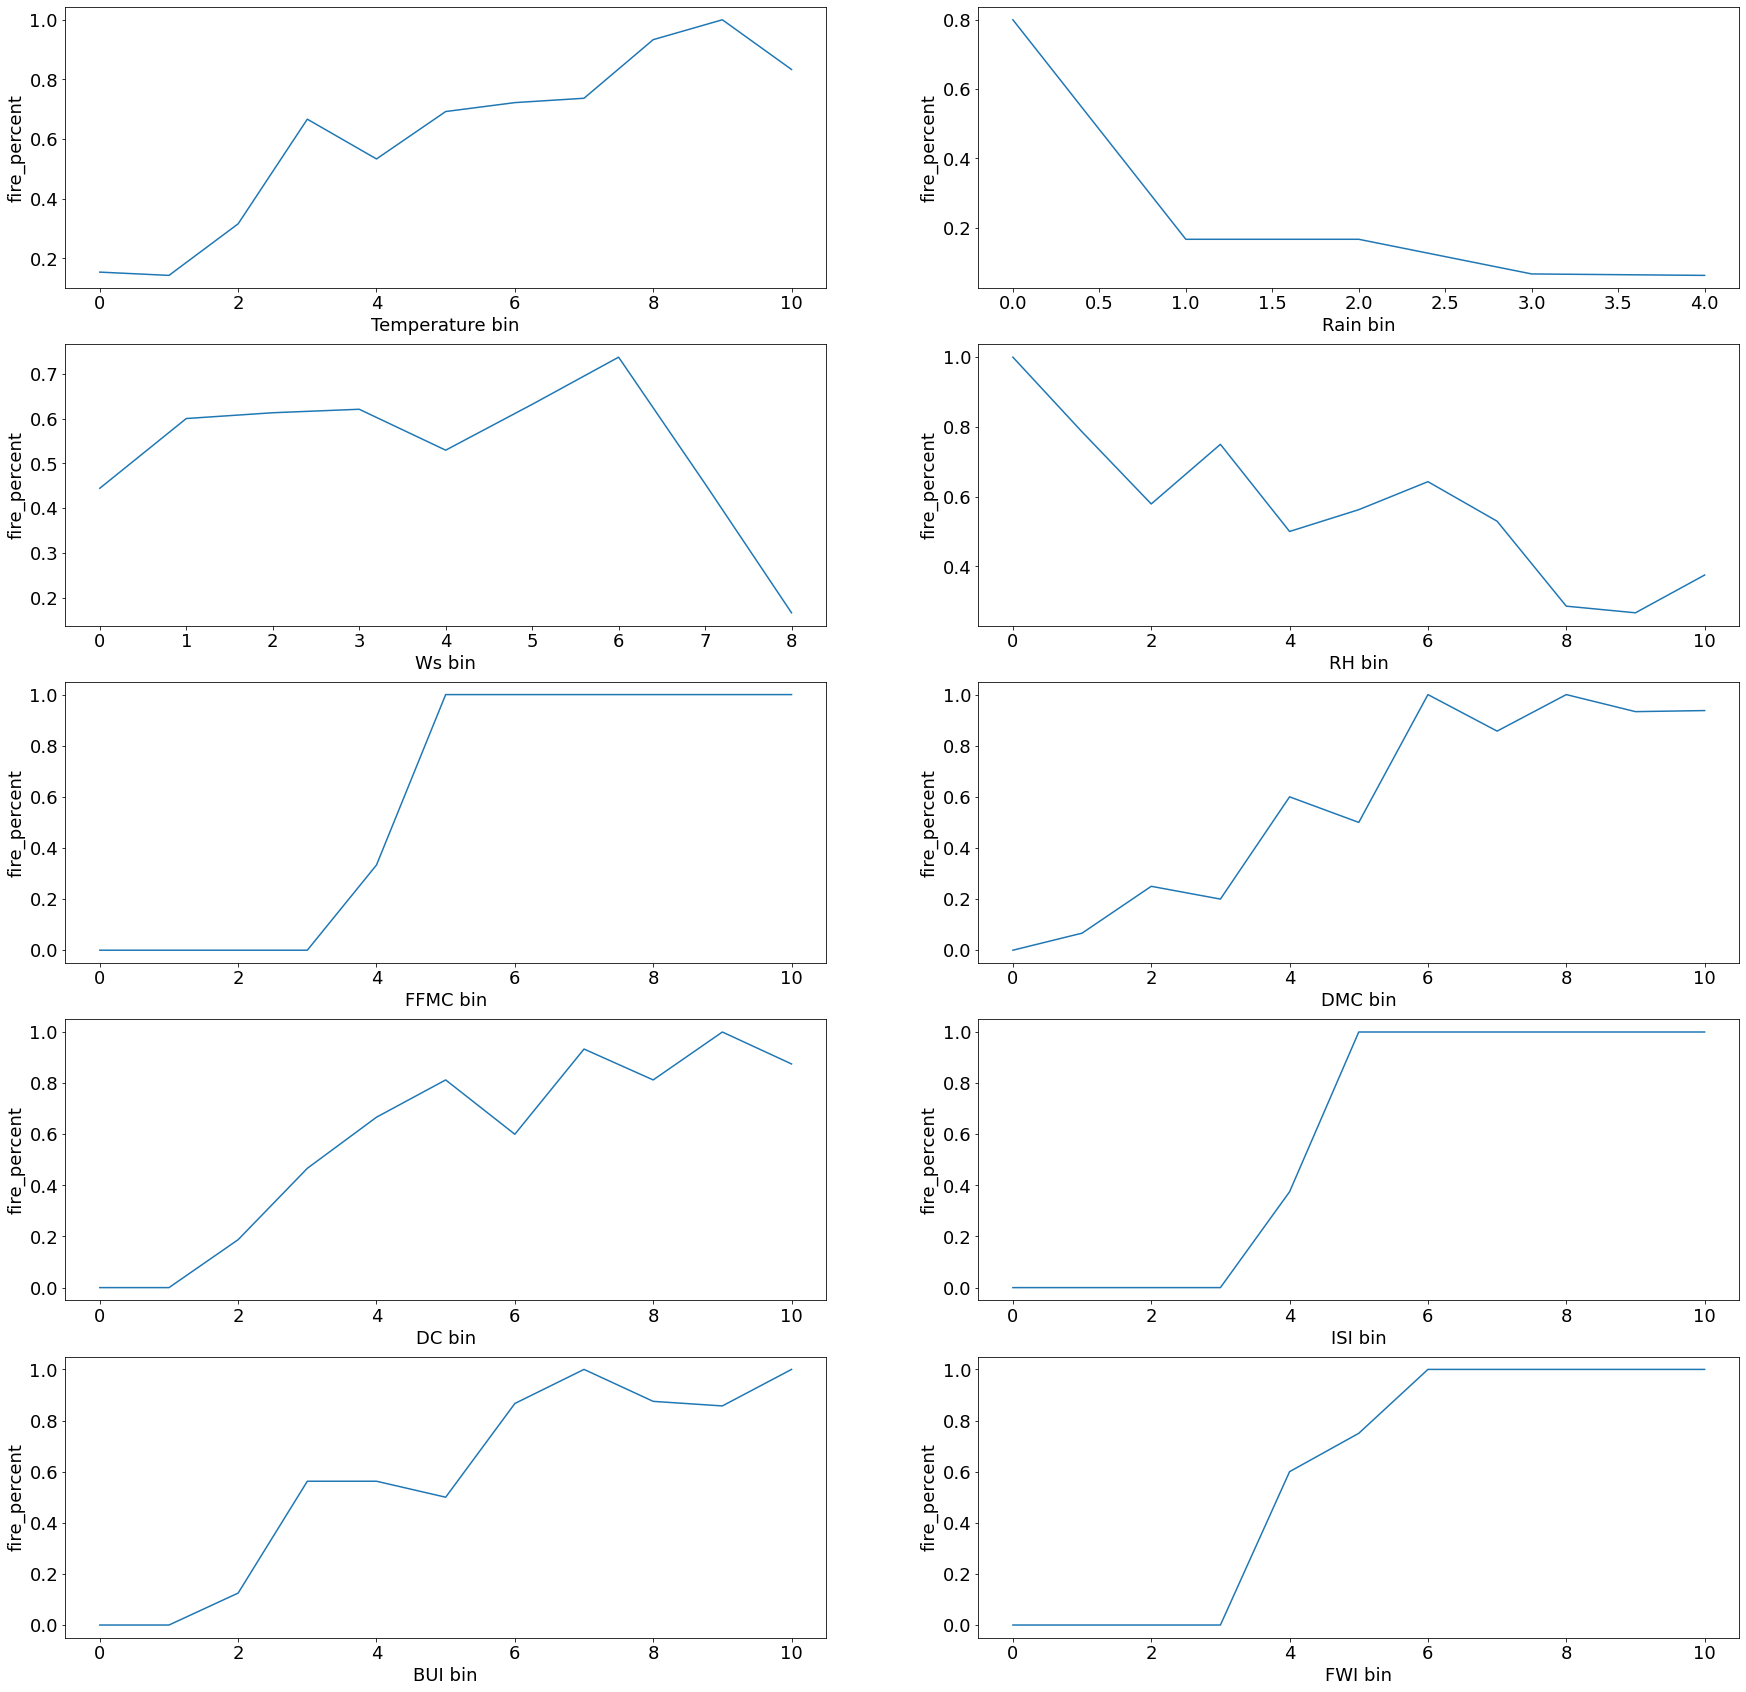

In [67]:
variables = ['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']

fig, axes = plt.subplots(5,2,figsize=(30,30))

var = 0

for i in range(5):
    for j in range(2):
        
        # Binning var
        binned = pd.qcut(train[variables[var]], 11, retbins = True, duplicates = 'drop')
        train['Binned'] = binned[0]
        
        data = train.groupby('Binned')['Classes'].agg([('fire_percent','mean'),('nobs','count')]).reset_index(drop=False)
        
        label = variables[var] + ' bin'
        axes[i,j].set_xlabel(label)
        
        
        sns.lineplot(ax = axes[i,j], x = data.index, y= data['fire_percent'])
        
        var += 1
        

No transformations necessary

Final Models (optimizing for recall):

1. best_fwd_reg_model_AIC_some
2. best_fwd_reg_model_AIC
3. best_subset_model_no_interaction
4. logit_model 

# Model Evaluation (Abenezer)

- ROC-AUC
- Confusion Matrix
- Precision, recall, that sort of thing
- 

0.9796380090497738


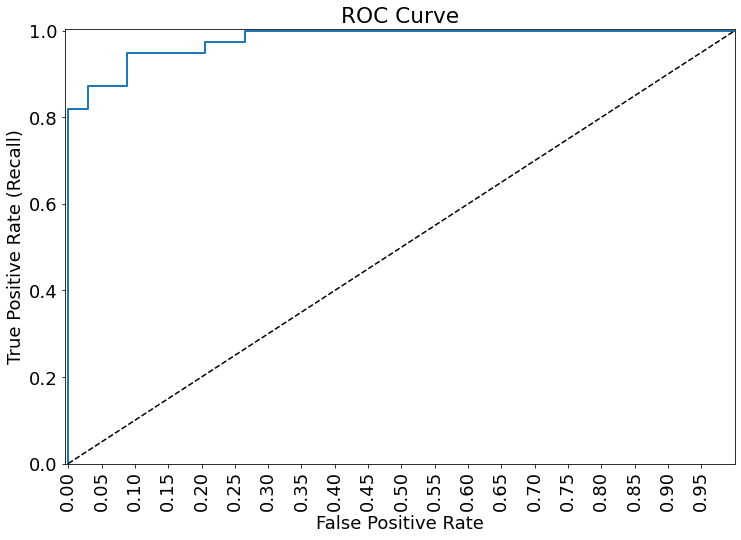

In [75]:
from sklearn.metrics import roc_curve, auc
y=test.Classes
ypred = best_fwd_reg_model_AIC_some.predict(test)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)